# Notebook 2: Univariate Analysis

In this notebook, each variable (both categorical and numerical) will be visualized and target variables will be selected

#### Table of contents
* [General overview](#general-overview)
* [Categorical variables](#categorical-variables)
    * [Main](#categorical-main_data)
    * [Biomarkers](#categorical-biomarker_data)
    * [Adni](#categorical-adni_data)
* [Numerical variables](#numerical-variables)
    * [Main](#numerical-main_data)
    * [Biomarkers](#numerical-biomarker_data)
    * [Adni](#numerical-adni_data) 
    * [Outliers](#outliers) 



## Imports


In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
# Gets src path 
src_path = os.path.dirname(os.getcwd())

# Adds src_path if it doesn't exist in sys.path (to access utils)
if os.path.exists(src_path) and src_path not in sys.path:
    sys.path.append(src_path)
    
import utils.data_tools as dt
import utils.viz_tools as vt

In [3]:
# Load datasets

df_main = pd.read_csv('../data/processed/main_data.csv')
df_bm = pd.read_csv('../data/processed/biomarker_data.csv')
df_adni = pd.read_csv('../data/processed/adni_data.csv')

## General overview

[Back to top](#table-of-contents)

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient_ID                   2149 non-null   object 
 1   Age                          2149 non-null   int64  
 2   Gender                       2149 non-null   int64  
 3   Ethnicity                    2149 non-null   object 
 4   Education_lv                 2149 non-null   int64  
 5   BMI                          2149 non-null   float64
 6   Smoking                      2149 non-null   int64  
 7   Alcohol_Consumption          2149 non-null   float64
 8   Physical_Activity            2149 non-null   float64
 9   Diet_Quality                 2149 non-null   float64
 10  Sleep_Quality                2149 non-null   float64
 11  Family_History_Alzheimers    2149 non-null   int64  
 12  CVD                          2149 non-null   int64  
 13  Diabetes          

In [5]:
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      113 non-null    object 
 1   Gender          113 non-null    int64  
 2   Age             113 non-null    int64  
 3   BMI             113 non-null    float64
 4   Education_yrs   113 non-null    int64  
 5   Smoking         113 non-null    int64  
 6   Drinking        113 non-null    int64  
 7   Hypertension    113 non-null    int64  
 8   CVD             113 non-null    int64  
 9   Diabetes        113 non-null    int64  
 10  MMSE            113 non-null    int64  
 11  MOCA            113 non-null    int64  
 12  DX              113 non-null    object 
 13  Plasma_GFAP     113 non-null    float64
 14  Plasma_NfL      113 non-null    float64
 15  Plasma_ptau181  113 non-null    float64
dtypes: float64(4), int64(10), object(2)
memory usage: 14.3+ KB


In [6]:
df_adni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      767 non-null    object 
 1   Age             767 non-null    float64
 2   Gender          767 non-null    int64  
 3   Ethnicity       767 non-null    object 
 4   Education_yrs   767 non-null    int64  
 5   Smoking         645 non-null    float64
 6   CVD             645 non-null    float64
 7   Diabetes        645 non-null    float64
 8   Depression      645 non-null    float64
 9   Hypertension    645 non-null    float64
 10  Stroke          645 non-null    float64
 11  MMSE            767 non-null    int64  
 12  MOCA            757 non-null    float64
 13  APOE4           767 non-null    int64  
 14  DX              767 non-null    object 
 15  Group           767 non-null    object 
 16  Plasma_ptau181  767 non-null    float64
dtypes: float64(9), int64(4), object(4)


In [7]:
# Check common columns in between datasets to see which can be compared in between them

main_bm = df_main.columns.intersection(df_bm.columns).to_list()
main_adni = df_main.columns.intersection(df_adni.columns).to_list()
bm_adni = df_bm.columns.intersection(df_adni.columns).to_list()
all_inters = df_main.columns.intersection(df_bm.columns.intersection(df_adni.columns)).to_list()

print('Main + biomarkers:', main_bm)
print('Main + adni:', main_adni)
print('Biomarkers + adni:', bm_adni)
print('All:', all_inters)

Main + biomarkers: ['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking', 'CVD', 'Diabetes', 'Hypertension', 'MMSE', 'DX']
Main + adni: ['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Smoking', 'CVD', 'Diabetes', 'Depression', 'Hypertension', 'MMSE', 'DX']
Biomarkers + adni: ['Patient_ID', 'Gender', 'Age', 'Education_yrs', 'Smoking', 'Hypertension', 'CVD', 'Diabetes', 'MMSE', 'MOCA', 'DX', 'Plasma_ptau181']
All: ['Patient_ID', 'Age', 'Gender', 'Smoking', 'CVD', 'Diabetes', 'Hypertension', 'MMSE', 'DX']


In [8]:
col_gen = ['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Education_lv', 'Education_yrs']
col_lifestyle = ['BMI', 'Smoking', 'Drinking', 'Alcohol_Consumption', 'Physical_Activity', 'Diet_Quality', 'Sleep_Quality']
col_clinical_history = ['APOE4', 'Family_History_Alzheimers', 'CVD', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'Head_Injury']
col_clinical_measurements = ['Systolic_BP', 'Diastolic_BP', 'Cholesterol_Total', 'Cholesterol_LDL', 'Cholesterol_HDL', 'Cholesterol_Triglycerides', 'Plasma_GFAP', 'Plasma_NfL', 'Plasma_ptau181']
col_as = ['MMSE', 'MOCA', 'Functional_Assessment', 'ADL']

## Categorical variables

### Categorical main_data

[Back to top](#table-of-contents)

In [9]:
main_classification = dt.classify_by_cardinality(df_main)
column_selection = main_classification.loc[main_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_main = column_selection.index.to_list()

new_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Education_lv': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'Family_History_Alzheimers': ['No', 'Yes'],
    'CVD': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'Head_Injury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'Memory_Complaints': ['No', 'Yes'],
    'Behavioral_Problems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'Personality_Changes': ['No', 'Yes'],
    'Difficulty_Completing_Tasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes'],
    'DX': ['No AD', 'AD']
}

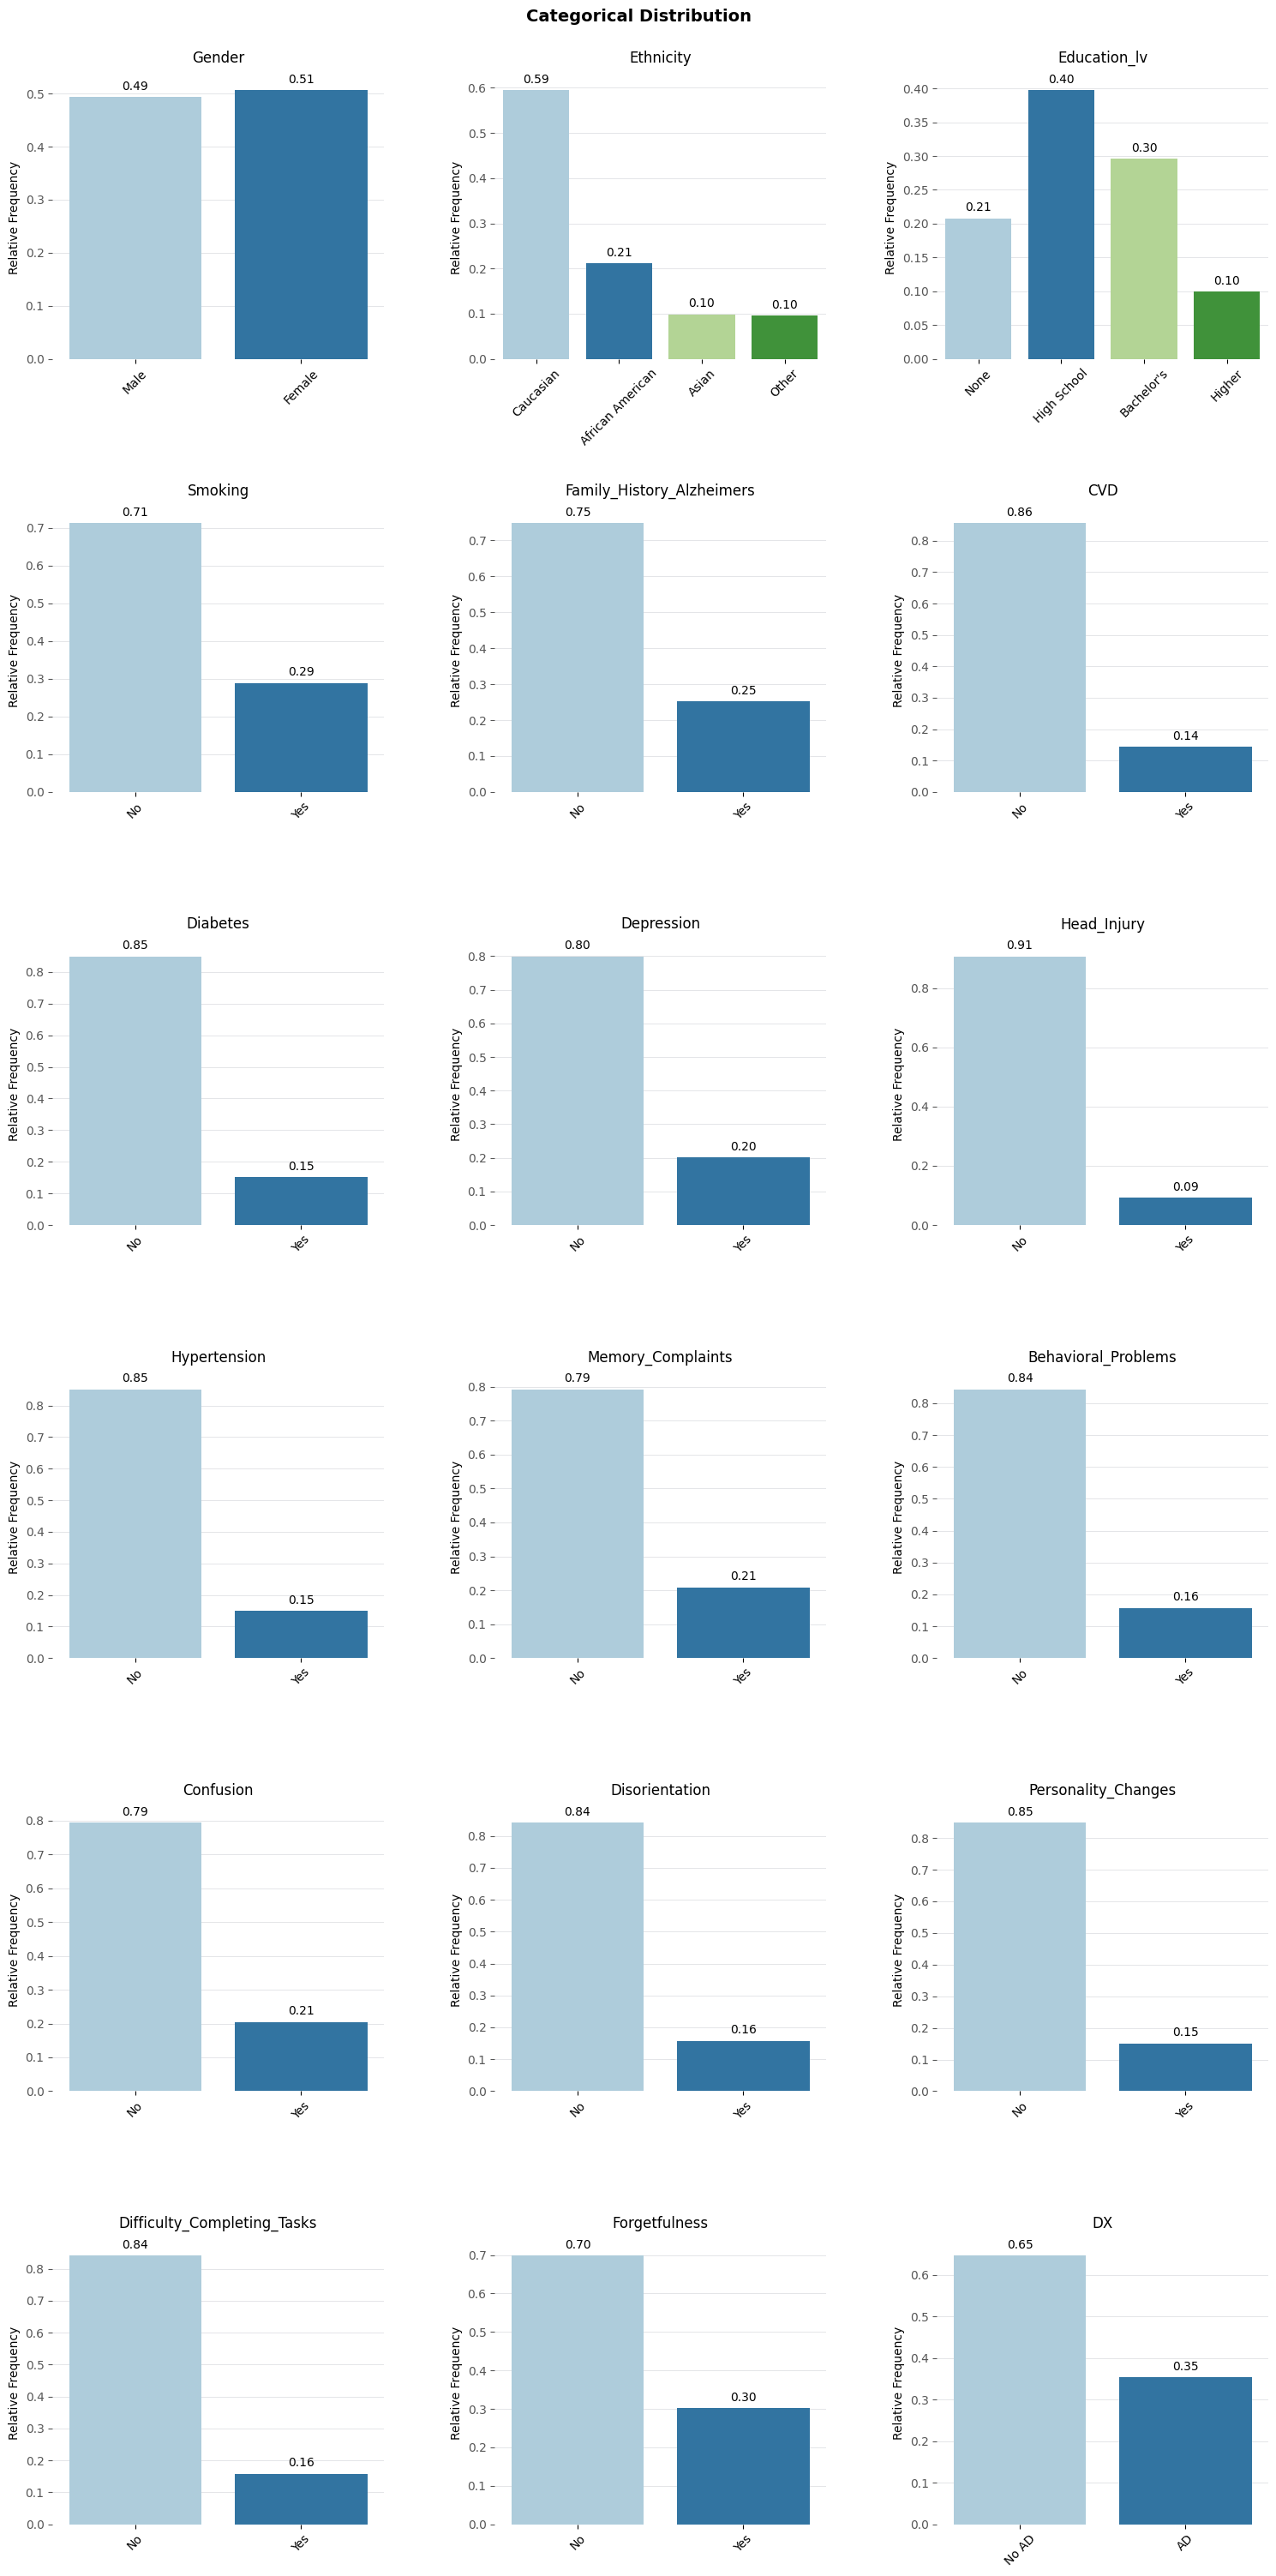

In [10]:
vt.plot_categorical_distribution(df_main, categorical_main, custom_labels = new_labels, relative = True, show_values=True, palette = 'Paired')

Summary after the visualization of categorical variables:

- Equal representation of males and females.
- The most represented demographic is Caucasian (possible bias).
- The largest educational group is High school graduates (40%) followed by individuals with a Bachelor's degree (30%).
- Most individuals have no health issues, no history of Alzheimer's Disease (familiar or personal) and no symtoms related to it.


### Categorical biomarker_data

[Back to top](#table-of-contents)

In [11]:
bm_classification = dt.classify_by_cardinality(df_bm)
column_selection = bm_classification.loc[bm_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_bm = column_selection.index.to_list()

new_labels = {
    'Gender': ['Male', 'Female'],
    'Smoking': ['No', 'Yes'],
    'Drinking': ['No', 'Yes'],
    'CVD': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'DX': ['CU', 'MCI', 'AD']
}

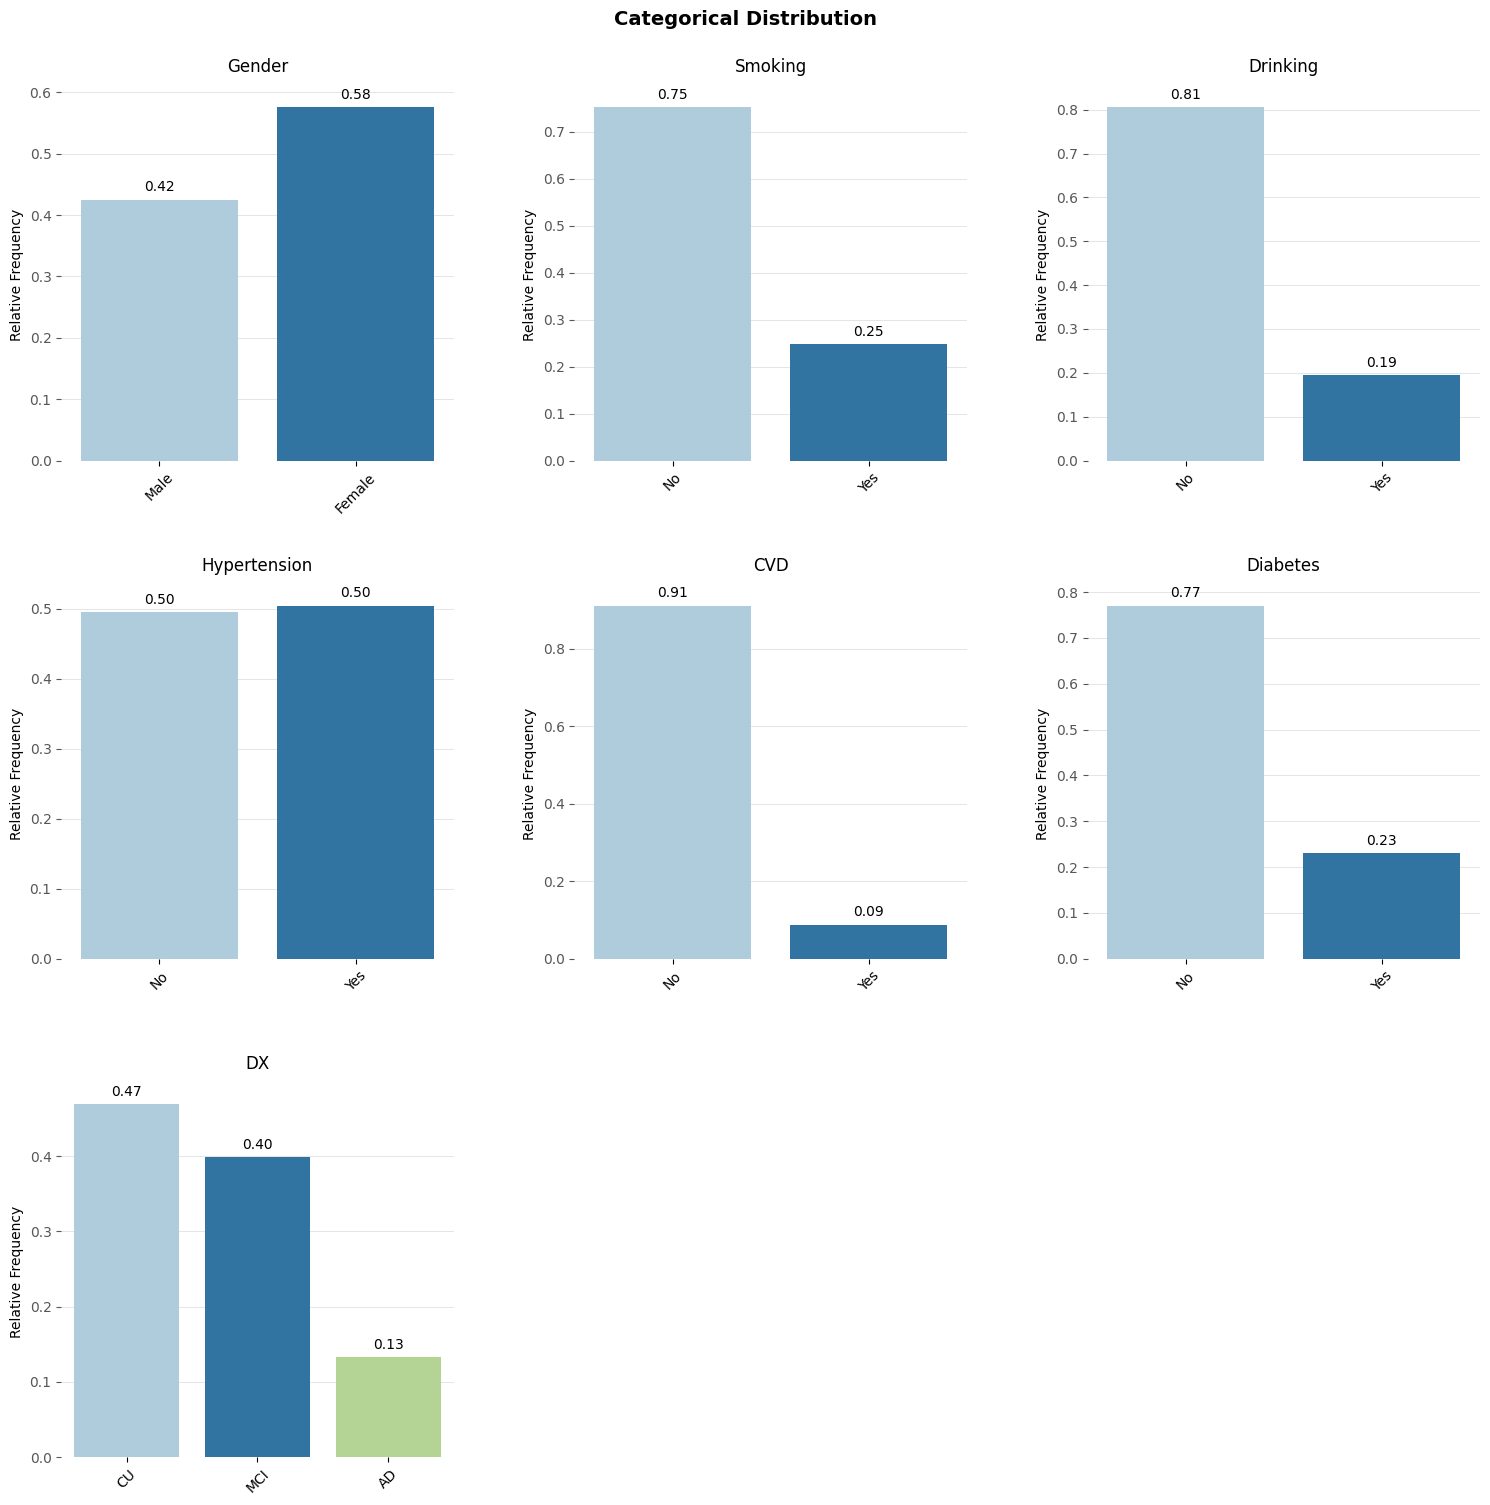

In [12]:
vt.plot_categorical_distribution(df_bm, categorical_bm, custom_labels = new_labels, relative = True, show_values=True, palette = 'Paired')

Summary after the visualization of categorical variables:

- Slightly more female representation.
- Hypertension is the most prevalent health problem.
- Almost equal representation of cognitively unimpaired (47%) and impaired (53%) individuals, but only 13% have been diagnosed with Alzheimer's Disease.


### Categorical adni_data

[Back to top](#table-of-contents)

In [13]:
t = df_adni.dropna()

In [14]:
adni_classification = dt.classify_by_cardinality(df_adni)
column_selection = adni_classification.loc[adni_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_adni = column_selection.index.to_list()
categorical_adni

new_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Smoking': ['No', 'Yes'],
    'CVD': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'Stroke': ['No', 'Yes'],
    'APOE4': ['No APOE4', 'Heterozygous', 'Homozygous'],
    'DX': ['CU', 'MCI', 'AD'],
    'Group': ['CU-', 'MCI-', 'MCI+', 'AD', 'CU+']
}

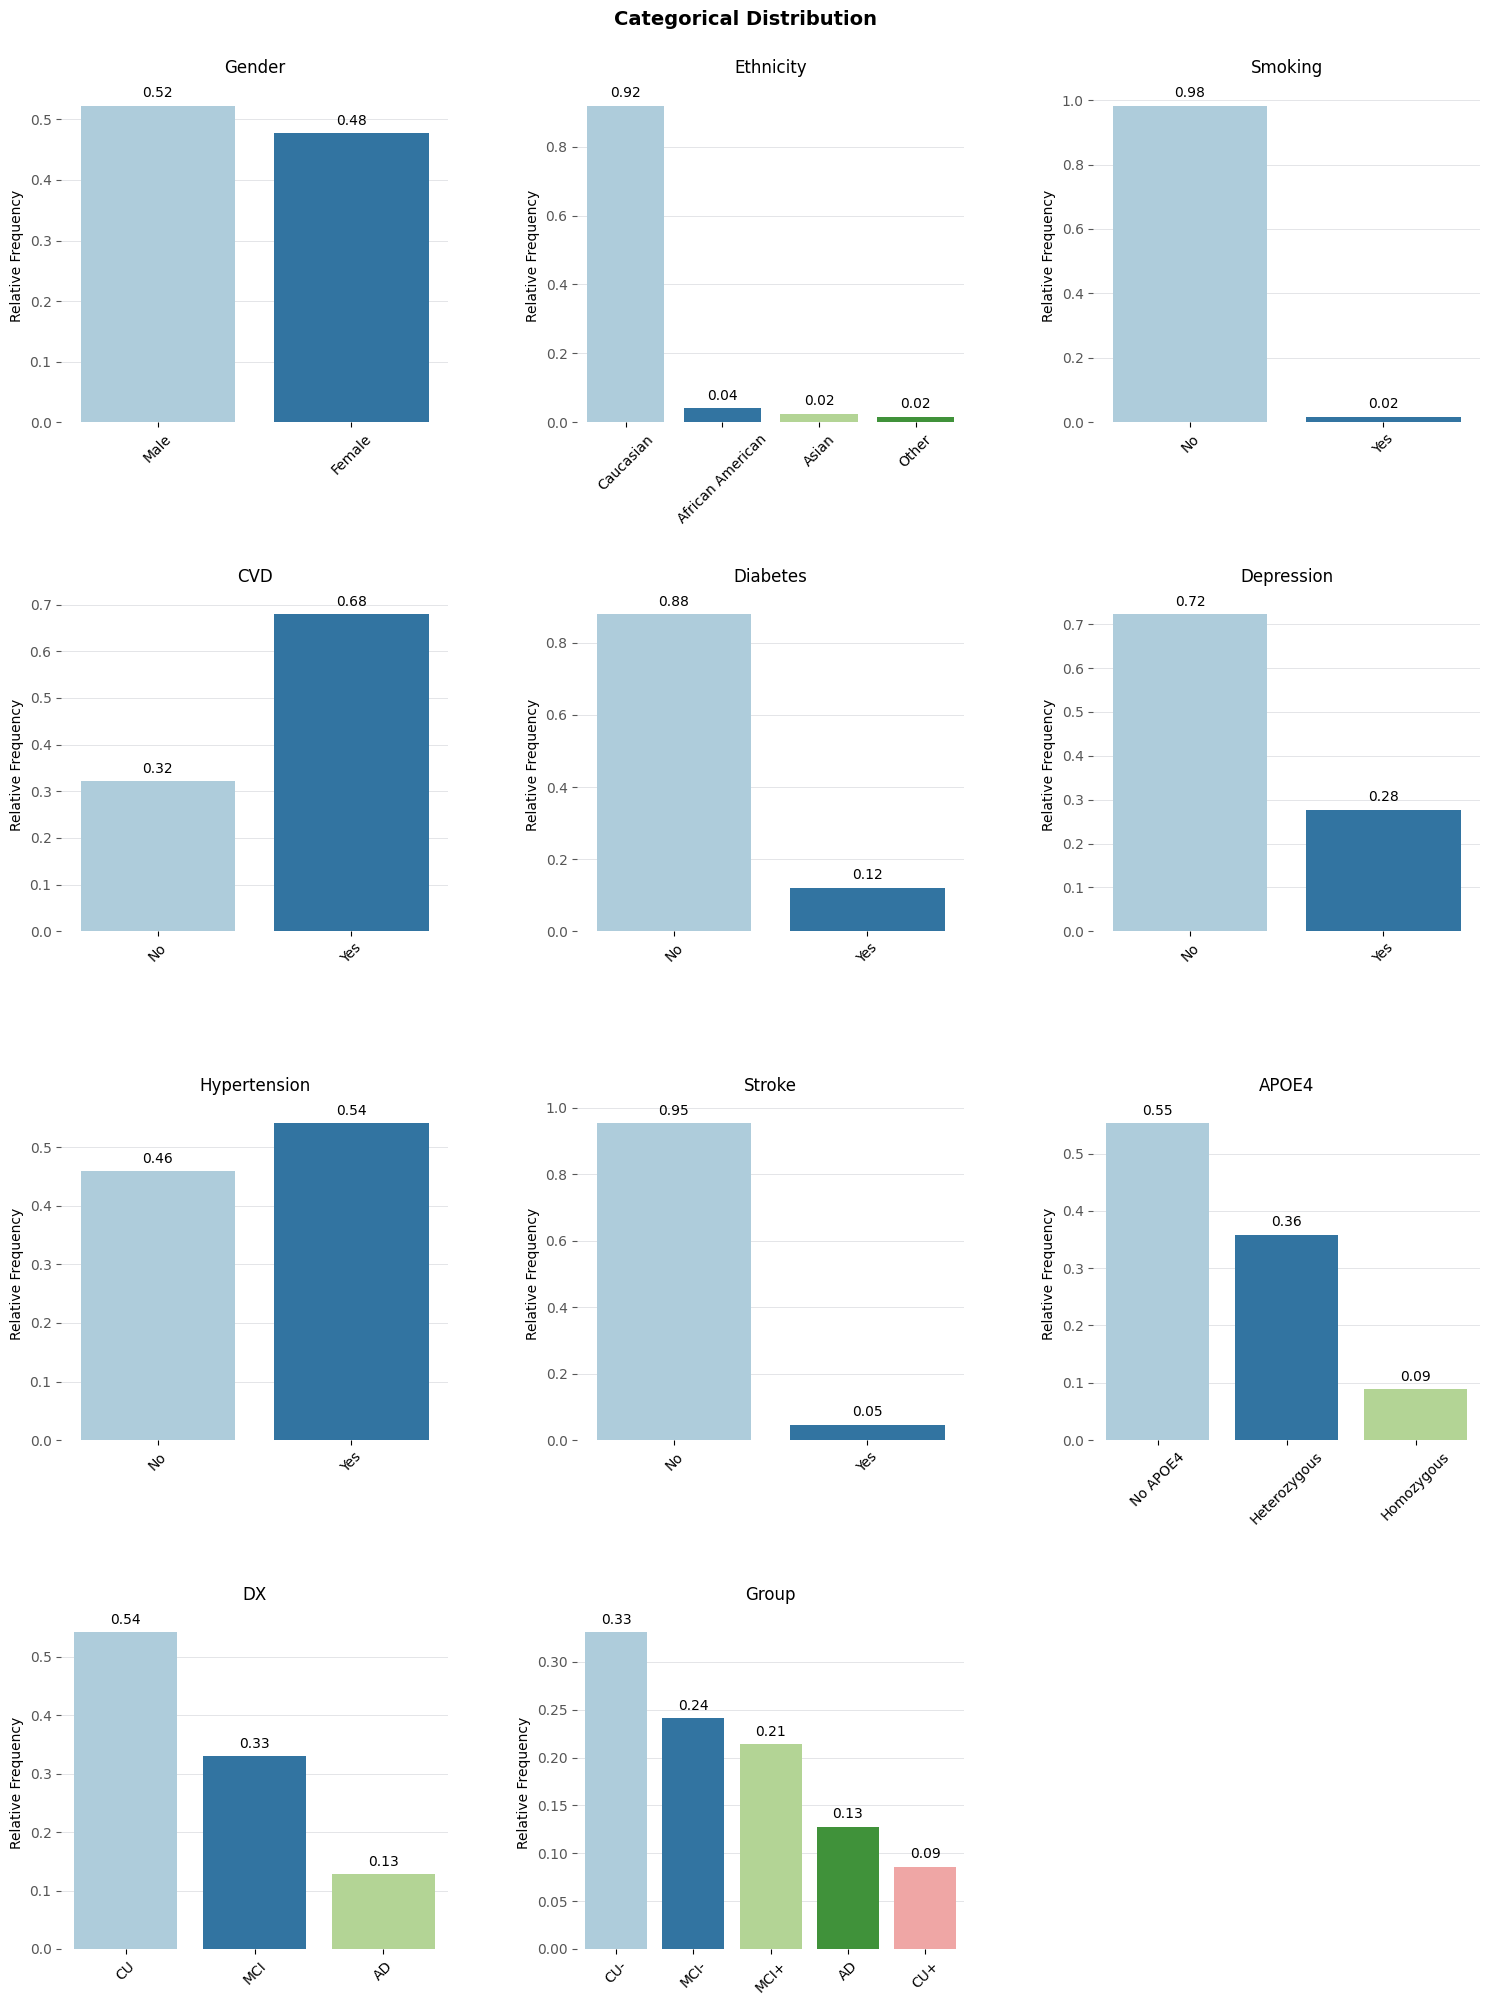

In [15]:
vt.plot_categorical_distribution(df_adni, categorical_adni, custom_labels = new_labels, relative = True, show_values = True, palette = 'Paired')

Summary after the visualization of categorical variables (with and without NaN values):

- Almost equal representation of males and females.
- The most represented demographic is Caucasian (possible bias).
- Cardiovascular Diseases and Hypertension are the most prevalent health problem.
- Most individuals don't carry the APOE4 gene.
- Most individuals are cognitively unimpaired.
- Almost equal representation of individuals with Mild Cognitive Impairment (MCI) with and without $\beta$-amyloid findings.


## Numerical variables

[Back to top](#table-of-contents)

### Numerical main_data


In [16]:
main_classification = dt.classify_by_cardinality(df_main)
column_selection = main_classification.loc[main_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_main = column_selection.index.to_list()
numerical_main

['Age',
 'BMI',
 'Alcohol_Consumption',
 'Physical_Activity',
 'Diet_Quality',
 'Sleep_Quality',
 'Systolic_BP',
 'Diastolic_BP',
 'Cholesterol_Total',
 'Cholesterol_LDL',
 'Cholesterol_HDL',
 'Cholesterol_Triglycerides',
 'MMSE',
 'Functional_Assessment',
 'ADL']

In [17]:
df_main[numerical_main].describe()

,Age,BMI,Alcohol_Consumption,Physical_Activity,Diet_Quality,Sleep_Quality,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Cholesterol_Triglycerides,MMSE,Functional_Assessment,ADL
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747


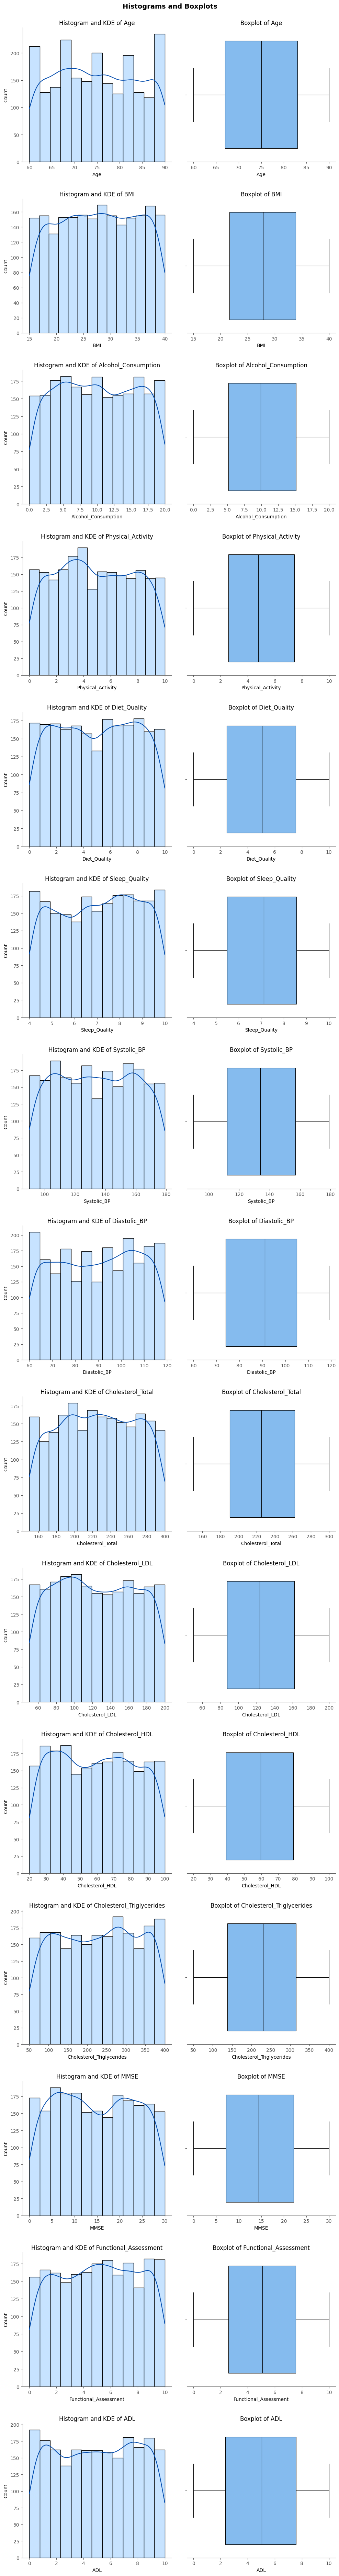

In [18]:
vt.plot_combined_numerical_distribution(df_main, numerical_main, kde = True, boxplot = True)

Summary after the visualization of numerical variables:

* In general, all variables show a very uniform distribution.
* No outliers.
* KDE of MMSE presents a clear drop in the middle of the score, which points to 2 differentiated groups of individuals.

### Numerical biomarker_data

[Back to top](#table-of-contents)

In [19]:
bm_classification = dt.classify_by_cardinality(df_bm)
column_selection = bm_classification.loc[bm_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_bm = column_selection.index.to_list()
numerical_bm

['Age',
 'BMI',
 'Education_yrs',
 'MMSE',
 'MOCA',
 'Plasma_GFAP',
 'Plasma_NfL',
 'Plasma_ptau181']

In [20]:
df_bm[numerical_bm].describe()

,Age,BMI,Education_yrs,MMSE,MOCA,Plasma_GFAP,Plasma_NfL,Plasma_ptau181
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,66.460177,23.632015,9.955752,25.637168,22.557522,177.090683,30.855488,2.729697
std,10.603264,3.309191,3.616405,6.053426,6.834704,108.827835,23.089488,1.947522
min,47.000000,15.464138,0.000000,2.000000,2.000000,27.646618,4.885645,0.329745
25%,58.000000,21.453287,8.000000,25.000000,20.000000,104.172007,16.514134,1.530000
50%,67.000000,23.437500,10.000000,28.000000,25.000000,158.918462,22.731267,2.162603
75%,74.000000,25.721032,12.000000,29.000000,28.000000,210.718853,36.809848,3.530901
max,92.000000,32.466181,16.000000,30.000000,30.000000,755.553740,143.351322,14.650480


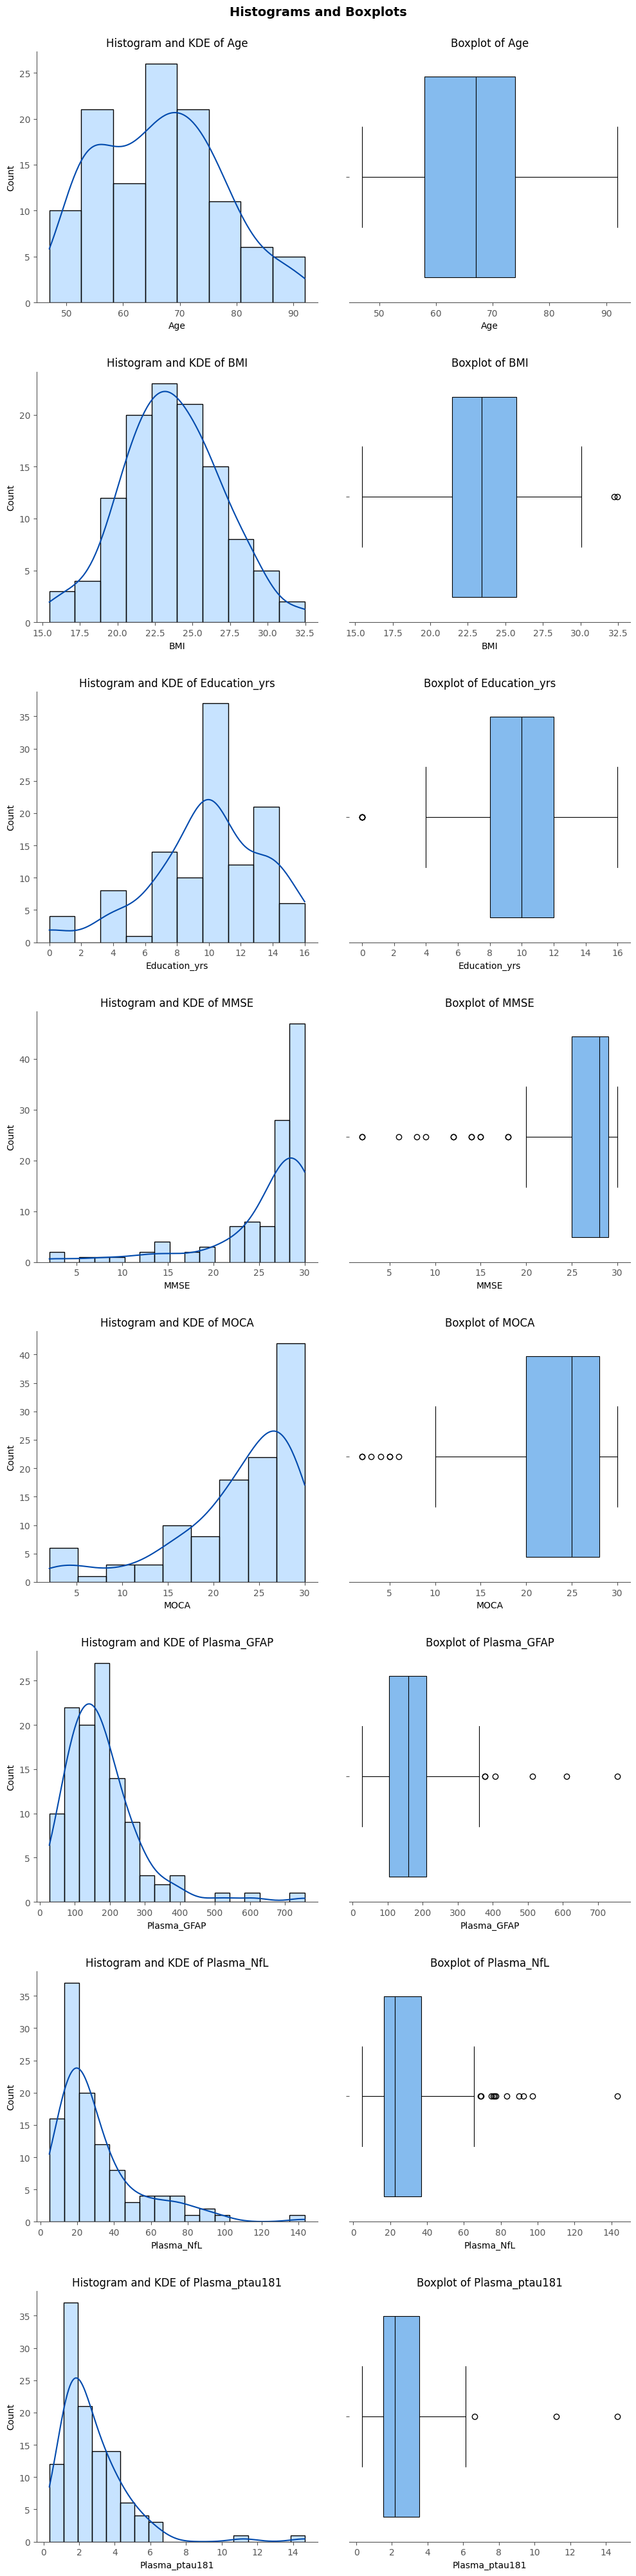

In [21]:
vt.plot_combined_numerical_distribution(df_bm, numerical_bm, kde = True, boxplot = True)

Summary after the visualization of numerical variables:

* Presence of outliers in almost all variables.
* Education_yrs, MMSE and MOCA are negatively skewed.
* Plasma_GFAP, Plasma_NfL and Plasma_ptau181 are positively skewed.

### Numerical adni_data

[Back to top](#table-of-contents)

In [22]:
adni_classification = dt.classify_by_cardinality(df_adni)
column_selection = adni_classification.loc[adni_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_adni = column_selection.index.to_list()
numerical_adni

['Age', 'Education_yrs', 'MMSE', 'MOCA', 'Plasma_ptau181']

In [23]:
df_adni[numerical_adni].describe()

,Age,Education_yrs,MMSE,MOCA,Plasma_ptau181
count,767.000000,767.000000,767.000000,757.000000,767.000000
mean,72.305346,16.314211,27.757497,23.463672,16.863807
std,7.116713,2.604795,2.442790,3.990772,8.863563
min,55.000000,8.000000,19.000000,4.000000,0.833000
25%,67.400000,14.000000,26.000000,21.000000,10.546500
50%,72.300000,16.000000,29.000000,24.000000,15.182000
75%,77.200000,18.000000,30.000000,26.000000,22.283500
max,91.400000,20.000000,30.000000,30.000000,48.854000


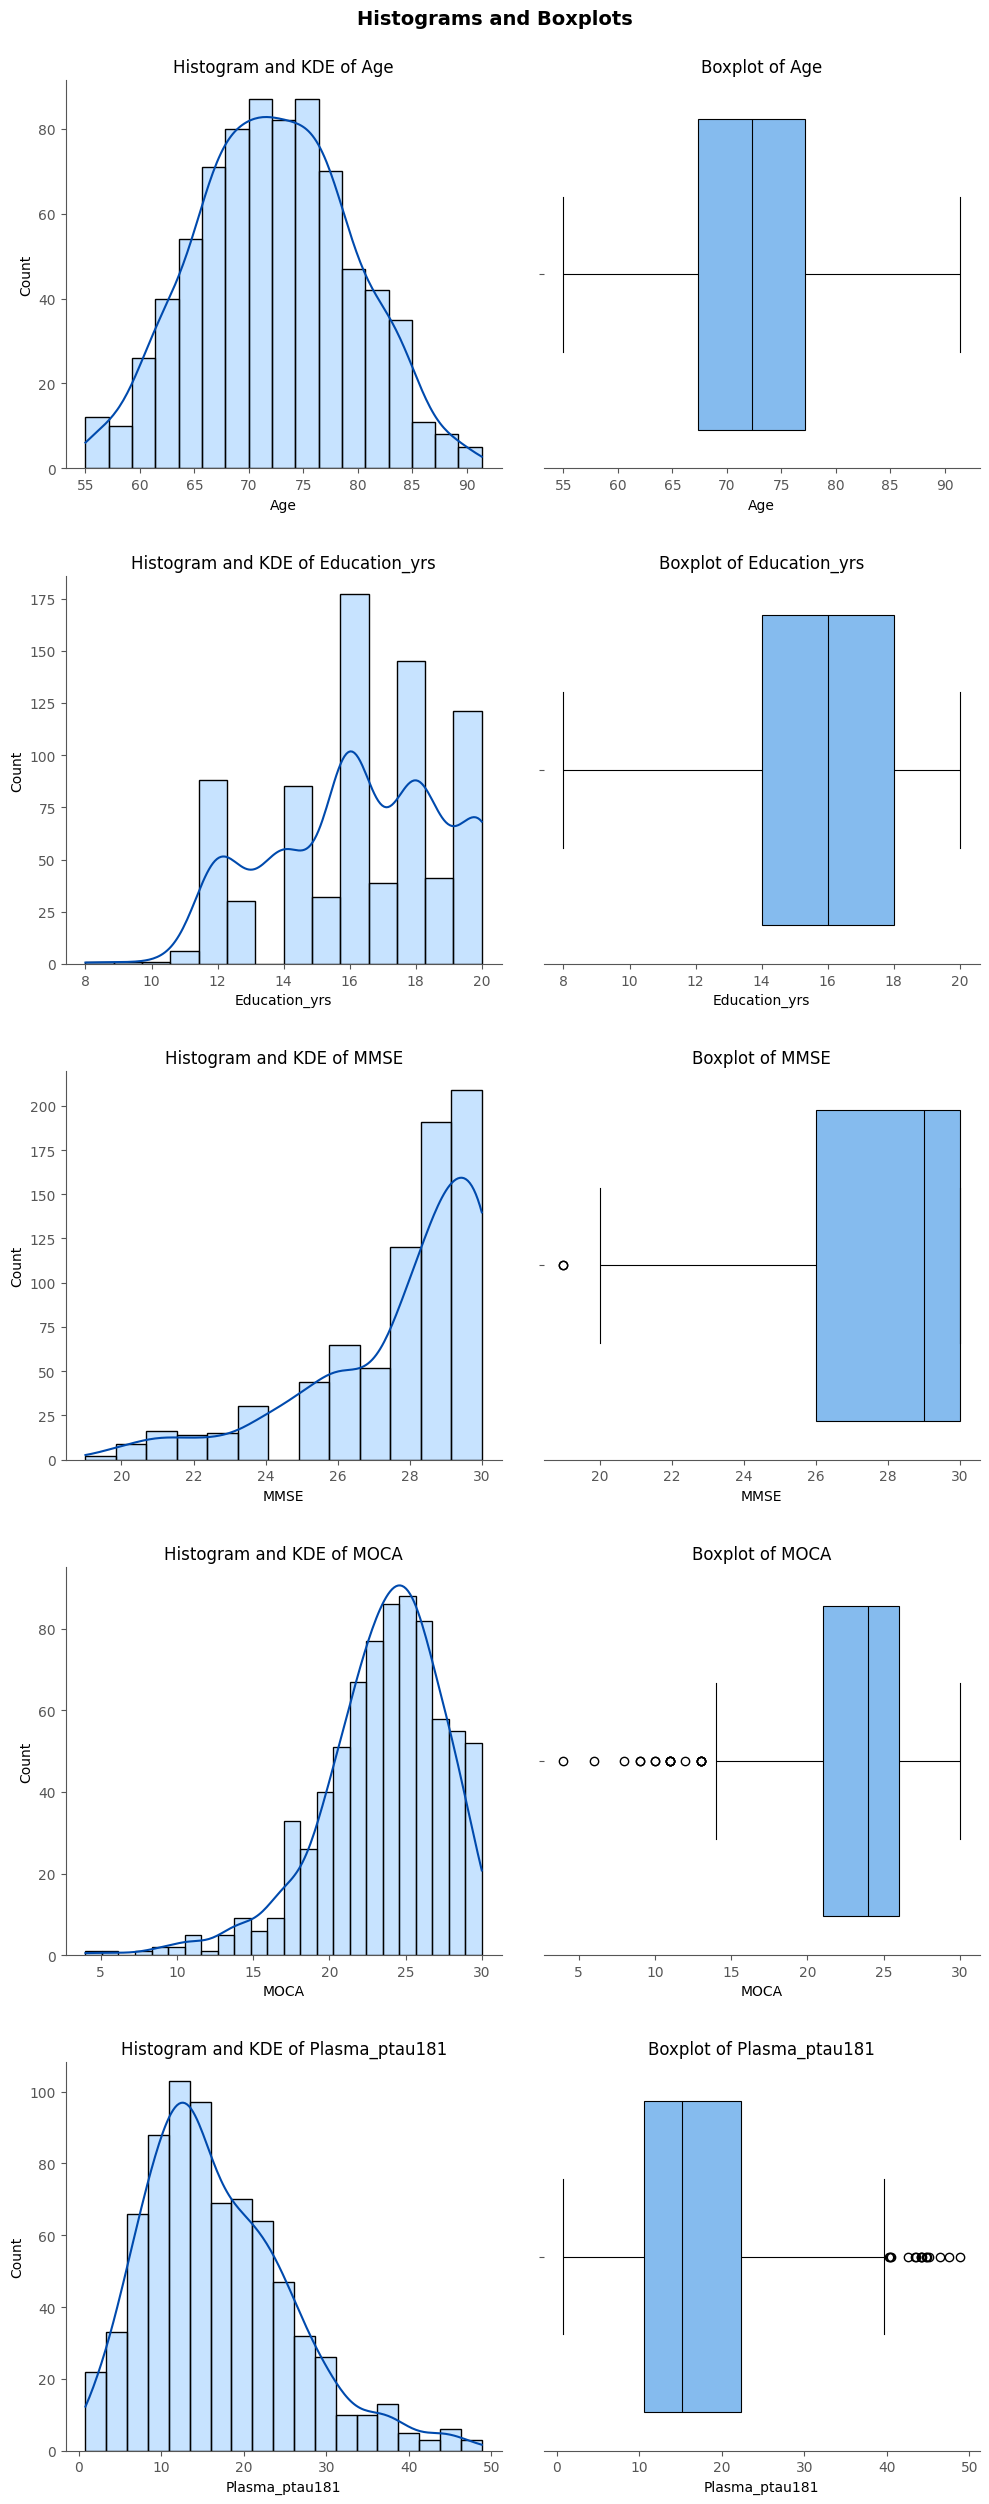

In [24]:
vt.plot_combined_numerical_distribution(df_adni, numerical_adni, kde = True, boxplot = True)

Summary after the visualization of numerical variables:

* Outliers in MOCA and Plasma_ptau181.
* MMSE and MOCA are negatively skewed.
* Plasma_ptau181 is positively skewed.

### Outliers

[Back to top](#table-of-contents)

No treatment is necessary for the outliers as they are clinical data and could point to relevant correlations